# Importação das bibliotecas e carregamento de dados

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np # algebra  linear 
import pandas as pd # para processamento de dados csv
import math
import datetime
import platform
import plotly.express as px # para gerar gráficos dinamicos

import os
for dirname, _, filenames in os.walk('/train/test'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [8]:
test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [10]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [11]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

# Visualização de dados utilizando TSNE

In [12]:
X_tsn = X/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)

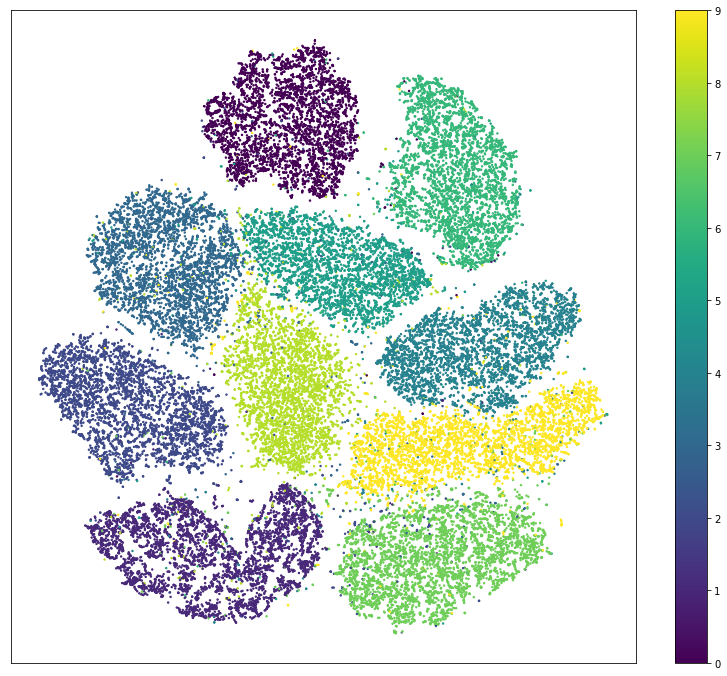

In [13]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

In [16]:
primeiroP = px.treemap(train, path = ['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9',])
primeiroP.show() # Relacionamentos

In [12]:
train.drop # Limpar dados inconsistentes

<bound method DataFrame.drop of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       

In [11]:
test.drop # Limpar dados inconsistentes

<bound method DataFrame.drop of        pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0

# Divisão de dados de treinamento e validação

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

# Dimensão de dados de treino e validação

In [10]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


# Conversão dos dados de treino, teste e validação em array

In [11]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

# Dimensão de dados de treino, teste e validação antes da remodelação

In [12]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [13]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


In [14]:
pd.DataFrame(x_train_re[0]) # formas de representação dos dados

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


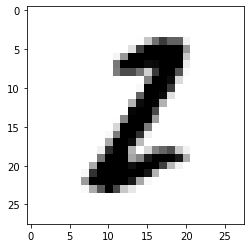

In [15]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary) # Visualização dos digitos como foram escritos
plt.show()

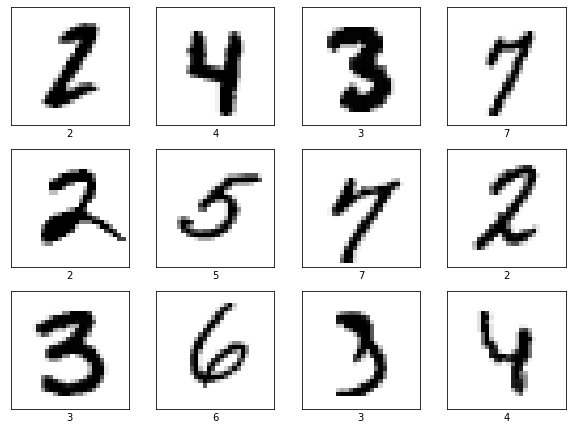

In [16]:
# 
numbers_to_display = 12
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

# Remodelação dos dados de treino, teste e validação

In [17]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [18]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


# Normalização dos dados  de treino, teste e validação

In [19]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [20]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

# Construção da rede neural

In [21]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

# Resumo do modelo de treinamento

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

#  Compilação do modelo usando keras.optimizers.Adam

In [25]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# Treinamento do modelo

In [26]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1050/1050 [==============================] - 26s 16ms/step - loss: 0.2652 - accuracy: 0.9190 - val_loss: 0.0853 - val_accuracy: 0.9731
Epoch 2/10
1050/1050 [==============================] - 17s 17ms/step - loss: 0.0827 - accuracy: 0.9744 - val_loss: 0.0578 - val_accuracy: 0.9819
Epoch 3/10
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0571 - accuracy: 0.9823 - val_loss: 0.0499 - val_accuracy: 0.9843
Epoch 4/10
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.0419 - val_accuracy: 0.9877
Epoch 5/10
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0367 - accuracy: 0.9880 - val_loss: 0.0432 - val_accuracy: 0.9883
Epoch 6/10
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0429 - val_accuracy: 0.9882
Epoch 7/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0403 -

# Avaliação do modelo

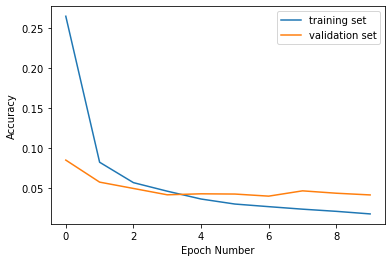

In [27]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

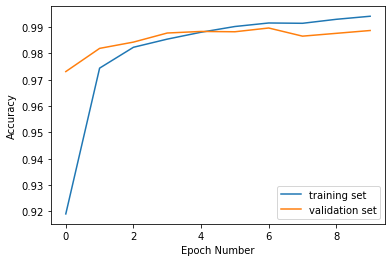

In [28]:
# Acuracia para o treinamento e validação
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

# Avaliação da acuracia do modelo

In [29]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re) # performance de treinamento de dados

In [30]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.01080239936709404
Train accuracy:  0.9967262148857117


# Performance de validação de dados

In [31]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [32]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04176941141486168
Validation accuracy:  0.9886904954910278


In [35]:
# Guardar o modelo como arquivo keras - formato h5 para sua reutilização no front-end
model_name = 'projeto_IAA_final.h5'
model.save(model_name, save_format='h5')

In [36]:
loaded_model = tf.keras.models.load_model(model_name)

# Visualização dos dados previstos de validação como os dígitos foram escritos

In [37]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 2s 6ms/step


In [38]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [39]:
# Matrizes de probabilidade
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.032770e-10,9.999995e-01,8.727229e-08,1.405952e-12,8.527807e-09,2.774364e-11,3.640989e-07,2.338106e-09,4.866065e-09,2.236379e-12
1,4.962300e-12,5.957063e-09,2.912474e-10,1.000000e+00,8.205686e-16,1.778125e-08,2.601343e-15,1.099978e-09,1.894171e-10,1.259514e-08
2,1.853643e-10,1.888122e-08,1.231026e-09,4.211909e-06,7.341121e-11,9.853631e-06,4.015570e-09,3.954501e-11,9.999859e-01,1.983020e-08
3,1.090003e-08,9.999834e-01,6.276745e-08,8.996707e-10,9.195438e-06,2.780425e-09,1.676070e-07,7.040698e-06,2.421369e-08,3.696233e-08
4,1.560116e-13,7.780156e-11,2.056455e-10,1.113704e-06,3.713174e-06,2.690026e-12,8.169535e-19,7.607892e-07,6.255364e-06,9.999882e-01
...,...,...,...,...,...,...,...,...,...,...
8395,5.198916e-20,9.921616e-15,5.755121e-14,4.632067e-18,1.000000e+00,2.805318e-15,4.392213e-12,5.172775e-16,3.577449e-16,1.658286e-12
8396,1.275099e-10,4.989499e-16,3.587728e-19,3.195548e-11,2.957258e-12,9.999982e-01,1.784565e-06,5.294131e-20,9.570574e-09,3.497522e-14
8397,5.759006e-11,2.140095e-09,1.027269e-10,3.281035e-09,1.152912e-07,3.131260e-11,1.646917e-15,9.999999e-01,2.292814e-09,1.894910e-08
8398,2.696801e-10,7.622261e-18,1.407877e-15,2.572075e-16,2.111002e-13,8.706380e-09,1.000000e+00,1.655411e-19,2.485333e-14,1.643802e-17


In [40]:
# Extração de previsões com probabilidades mais altas e detectar quais dígitos foram realmente reconhecidos.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


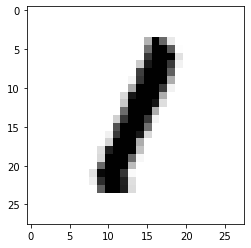

In [41]:
# Teste dos dados de validação para aferir a previsao do modelo
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

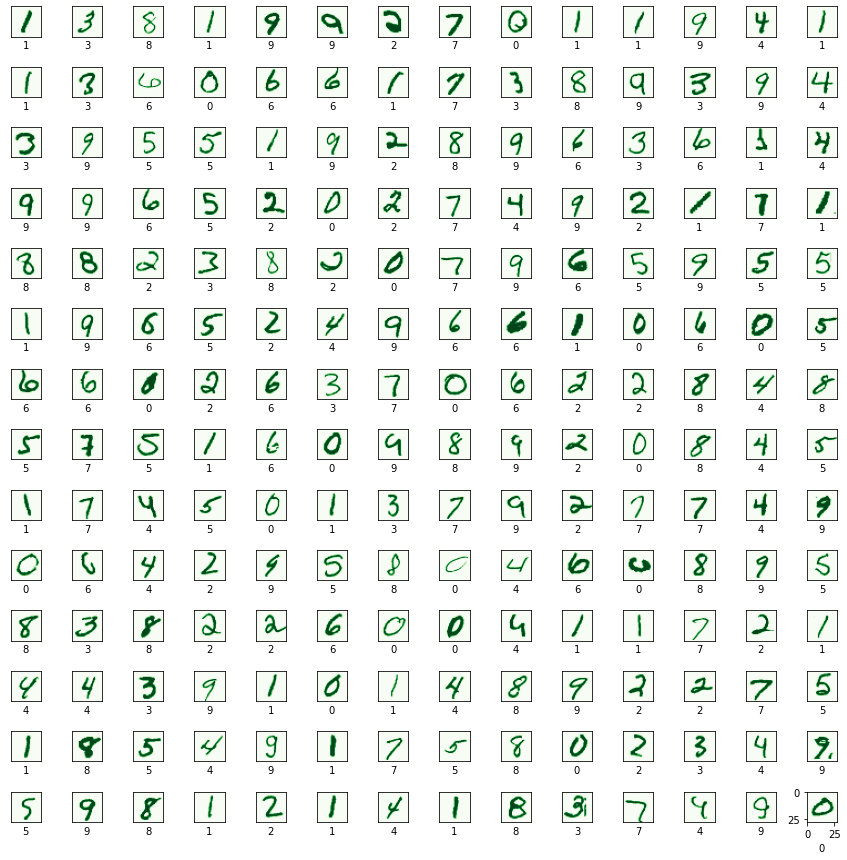

In [42]:
# Analise de performance do modelo com todos dados
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

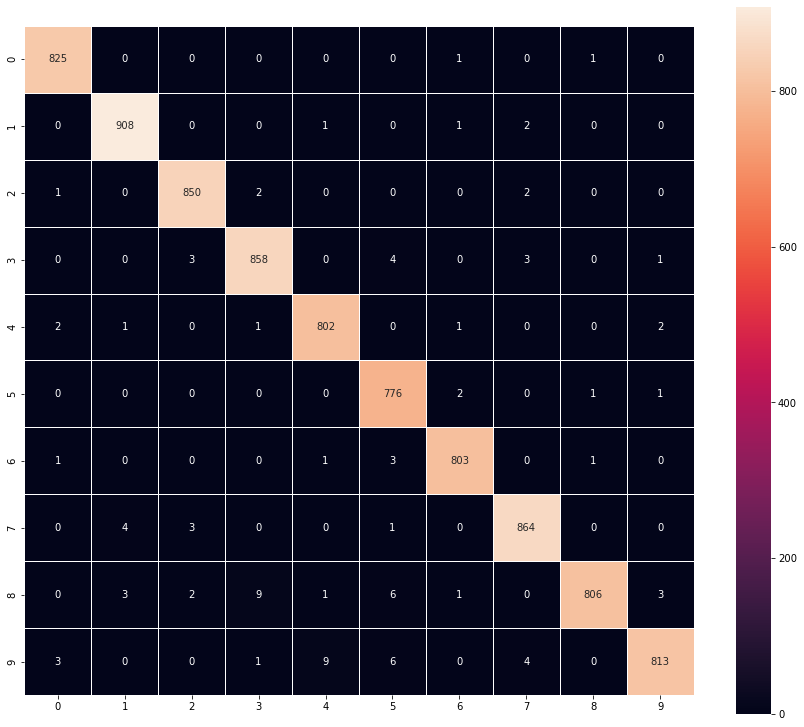

In [44]:
# Matriz de confusão de validação de dados 
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(15, 13))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

In [45]:
# Previsao do modelo de dados de teste
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 6s 7ms/step
predictions_one_hot: (28000, 10)


In [46]:
# Probabilidade predita para todos os numeros
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,7.248099e-12,4.927109e-13,1.000000e+00,1.439588e-11,1.493666e-15,5.598479e-17,8.892013e-16,1.493128e-11,2.263298e-13,4.700690e-17
1,9.999974e-01,5.047199e-14,4.625598e-08,2.733102e-11,3.245578e-14,2.375740e-06,1.689118e-07,2.947705e-08,7.429144e-11,1.608676e-08
2,2.472907e-11,9.062882e-09,1.327195e-08,3.452764e-06,2.746682e-04,2.441378e-09,1.783620e-14,1.099223e-06,6.305122e-06,9.997144e-01
3,7.996765e-01,9.918033e-07,7.470913e-03,2.695941e-03,1.765056e-05,1.058213e-05,4.914994e-06,6.257391e-05,1.965895e-04,1.898634e-01
4,3.172982e-10,5.869477e-07,3.419104e-07,9.999986e-01,1.473777e-13,2.773315e-07,1.710311e-11,1.953492e-07,3.207784e-09,9.868312e-10
...,...,...,...,...,...,...,...,...,...,...
27995,4.809397e-15,5.051580e-15,9.252089e-15,6.816456e-08,1.573287e-07,1.280095e-08,4.399637e-21,2.051809e-10,1.601895e-08,9.999998e-01
27996,8.070831e-11,3.284075e-10,8.486677e-08,2.178160e-06,5.329762e-08,3.481347e-10,1.928275e-14,9.999975e-01,1.358873e-11,2.147382e-07
27997,1.949737e-22,8.936973e-15,2.955022e-18,1.000000e+00,1.160260e-22,4.559039e-13,1.853897e-24,8.381781e-15,5.240519e-17,4.222266e-16
27998,1.404199e-12,2.602457e-09,4.211384e-11,9.148831e-06,7.892161e-05,1.336963e-08,7.154365e-16,1.613988e-07,7.291788e-08,9.999117e-01


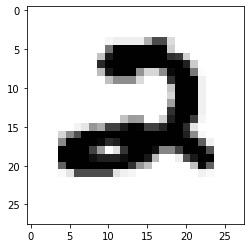

In [47]:
# Visualização dos dados previstos de teste como os dígitos foram escritos
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

In [49]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1
test_pred.head()

875/875 [==============================] - 6s 6ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
